# House predictions with linear regression(Assignment 3 Question 3)

<b> 3a) Import the nexessary libraries and modules.</b> 

In [1]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

<b> 3b) Import the data from <i>Hyderabad.csv</i> into an SFrame named "data". </b>

In [2]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/qyu2/SupervisedML/Assignment1/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.051454 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/qyu2/SupervisedML/Assignment1/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.041234 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


<b> 3c) Show two scatter plots: <i>Price vs. Area</i> and <i>Price vs. No. of Bedrooms</i>.</b>

### Exploring the relationship between price and area

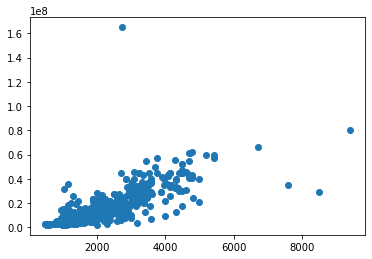

In [3]:
plt.scatter(data['Area'], data['Price'])

### Exploring the relationship between price and Number of Bedrooms

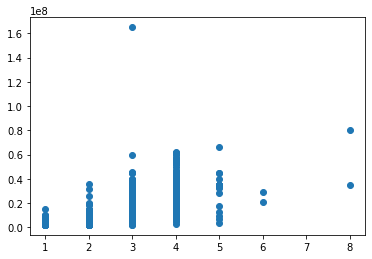

In [5]:
plt.scatter(data['No. of Bedrooms'], data['Price'])

<b> 3d) Create a model. </b>

In [6]:
two_feature_model = tc.linear_regression.create(data, features=['Area','No. of Bedrooms'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.013958     | 143784105.149257   | 16421996.245136      | 4937464.215649                  | 3124253.339262                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

<b> List the cofficients of the optimal solutions </b>

In [7]:
two_feature_model.coefficients

name,index,value,stderr
(intercept),None,-3954647.8463405967,422014.9710586501
Area,None,10824.40557757239,222.632848357483
No. of Bedrooms,None,-1532190.8804134354,241969.51596873457


<b> 3e) Use your trained model to predict the price of a house with: </b>
<ul> <li> 6000 square feet and 4 bedrooms</li></ul>

In [14]:
house_6000SF_4rooms = tc.SFrame({'Area': [6000], 'No. of Bedrooms':[4]})
house_6000SF_4rooms

Area,No. of Bedrooms
6000,4


In [12]:
two_feature_model.predict(house_6000SF_4rooms)

dtype: float
Rows: 1
[54863022.097440004]

The price of a house with 6000 square feet and 4 bedrooms is  $54,863,022.10.

<ul> <li> 1000 square feet and 3 bedrooms</li></ul>

In [15]:
house_1000SF_3rooms = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house_1000SF_3rooms

Area,No. of Bedrooms
1000,3


In [16]:
two_feature_model.predict(house_1000SF_3rooms)

dtype: float
Rows: 1
[2273185.0899914876]

The price of a house with 1000 square feet and 3 bedrooms is $2,273,185.09. 

<b> 3f) What is the maximum error and root-mean-squared error of <i>two_feature_model</i>?</b>

In [18]:
two_feature_model.evaluate(data)

{'max_error': 143784105.14925683, 'rmse': 4862827.640291838}

The maximum error of two_feature_model is 143,784,105.14 and the root-mean-squared error of two_feature_model is 4,862,827.64. The maximum error of all_feature_model is 140,156,583.60 and the root-mean-squared error is 4,239,731.30. The errors for two_feature_model are higher than the errors for all_feature_model. Lower values of errors indicate better fit; therefore, all_feature_model is better in this case. 